# **Sommaire**

* Loading the Data                                                                            
* Data visualization and
  cleaning
* Les valeurs manquantes 

* Feature Engineering

* Models

 * Définir Train/Test

 * Linear regression
 
 * Decision Tree Regression

 * Random Forest Regression

 * xgboost

 * Gradient Boosting Regression / Parameter tuning

* Sumbission 

============================================       Fait par : Youssef FAOUZI    
============================================    Encadré par : M. ALEXIS PERRIER 





##**Loading the Data**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:

train=pd.read_csv("https://drive.google.com/uc?export=download&id=1XJ7_LNUEXz8rRyIsxSghQi5RI0bef9Zr")
test=pd.read_csv("https://drive.google.com/uc?export=download&id=1jA0gcJcln26zg0QXivz26_F_8CNSBni0")
submission=pd.read_csv('https://drive.google.com/uc?export=download&id=1ZLQLEIw8XfG_-xvHFvMnoli4ly8Cevud') 

##**Data visualization and cleaning**

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
#Different types of the features
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
train.shape

(1460, 77)

In [ ]:
# Descrption de la variable cible 
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<function tuple.index>

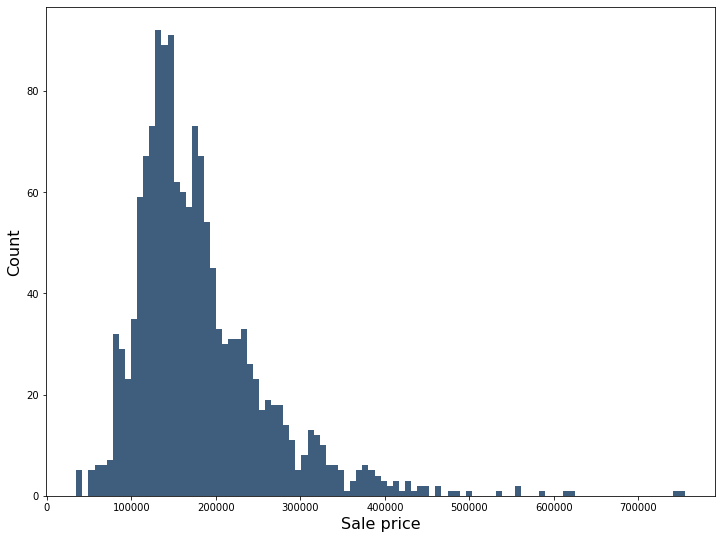

In [ ]:
#Histogramme de la vraible cible 

plt.figure(figsize=(12, 9)) 
plt.xlabel("Sale price", fontsize=16)  
plt.ylabel("Count", fontsize=16)
p=plt.hist(train.SalePrice.values ,  color="#3F5D7D", bins=100, )
p.index

In [ ]:
train.corr()['SalePrice']

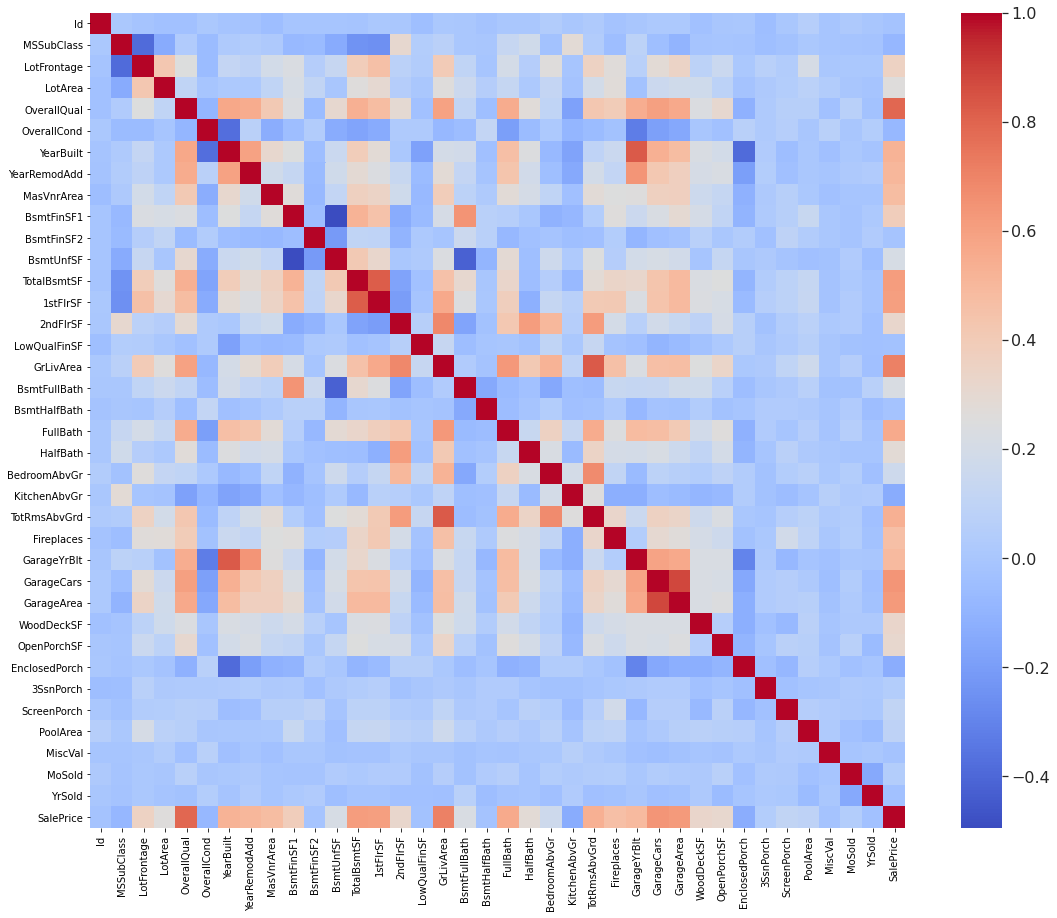

In [ ]:
#la carte des correlations 

corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.45)
sns.heatmap(corrmat, square=True,cmap='coolwarm');

In [ ]:
correlations = corrmat["SalePrice"].sort_values(ascending=False)
mostCorrelated = correlations.index[0:10]
mostCorrelated

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


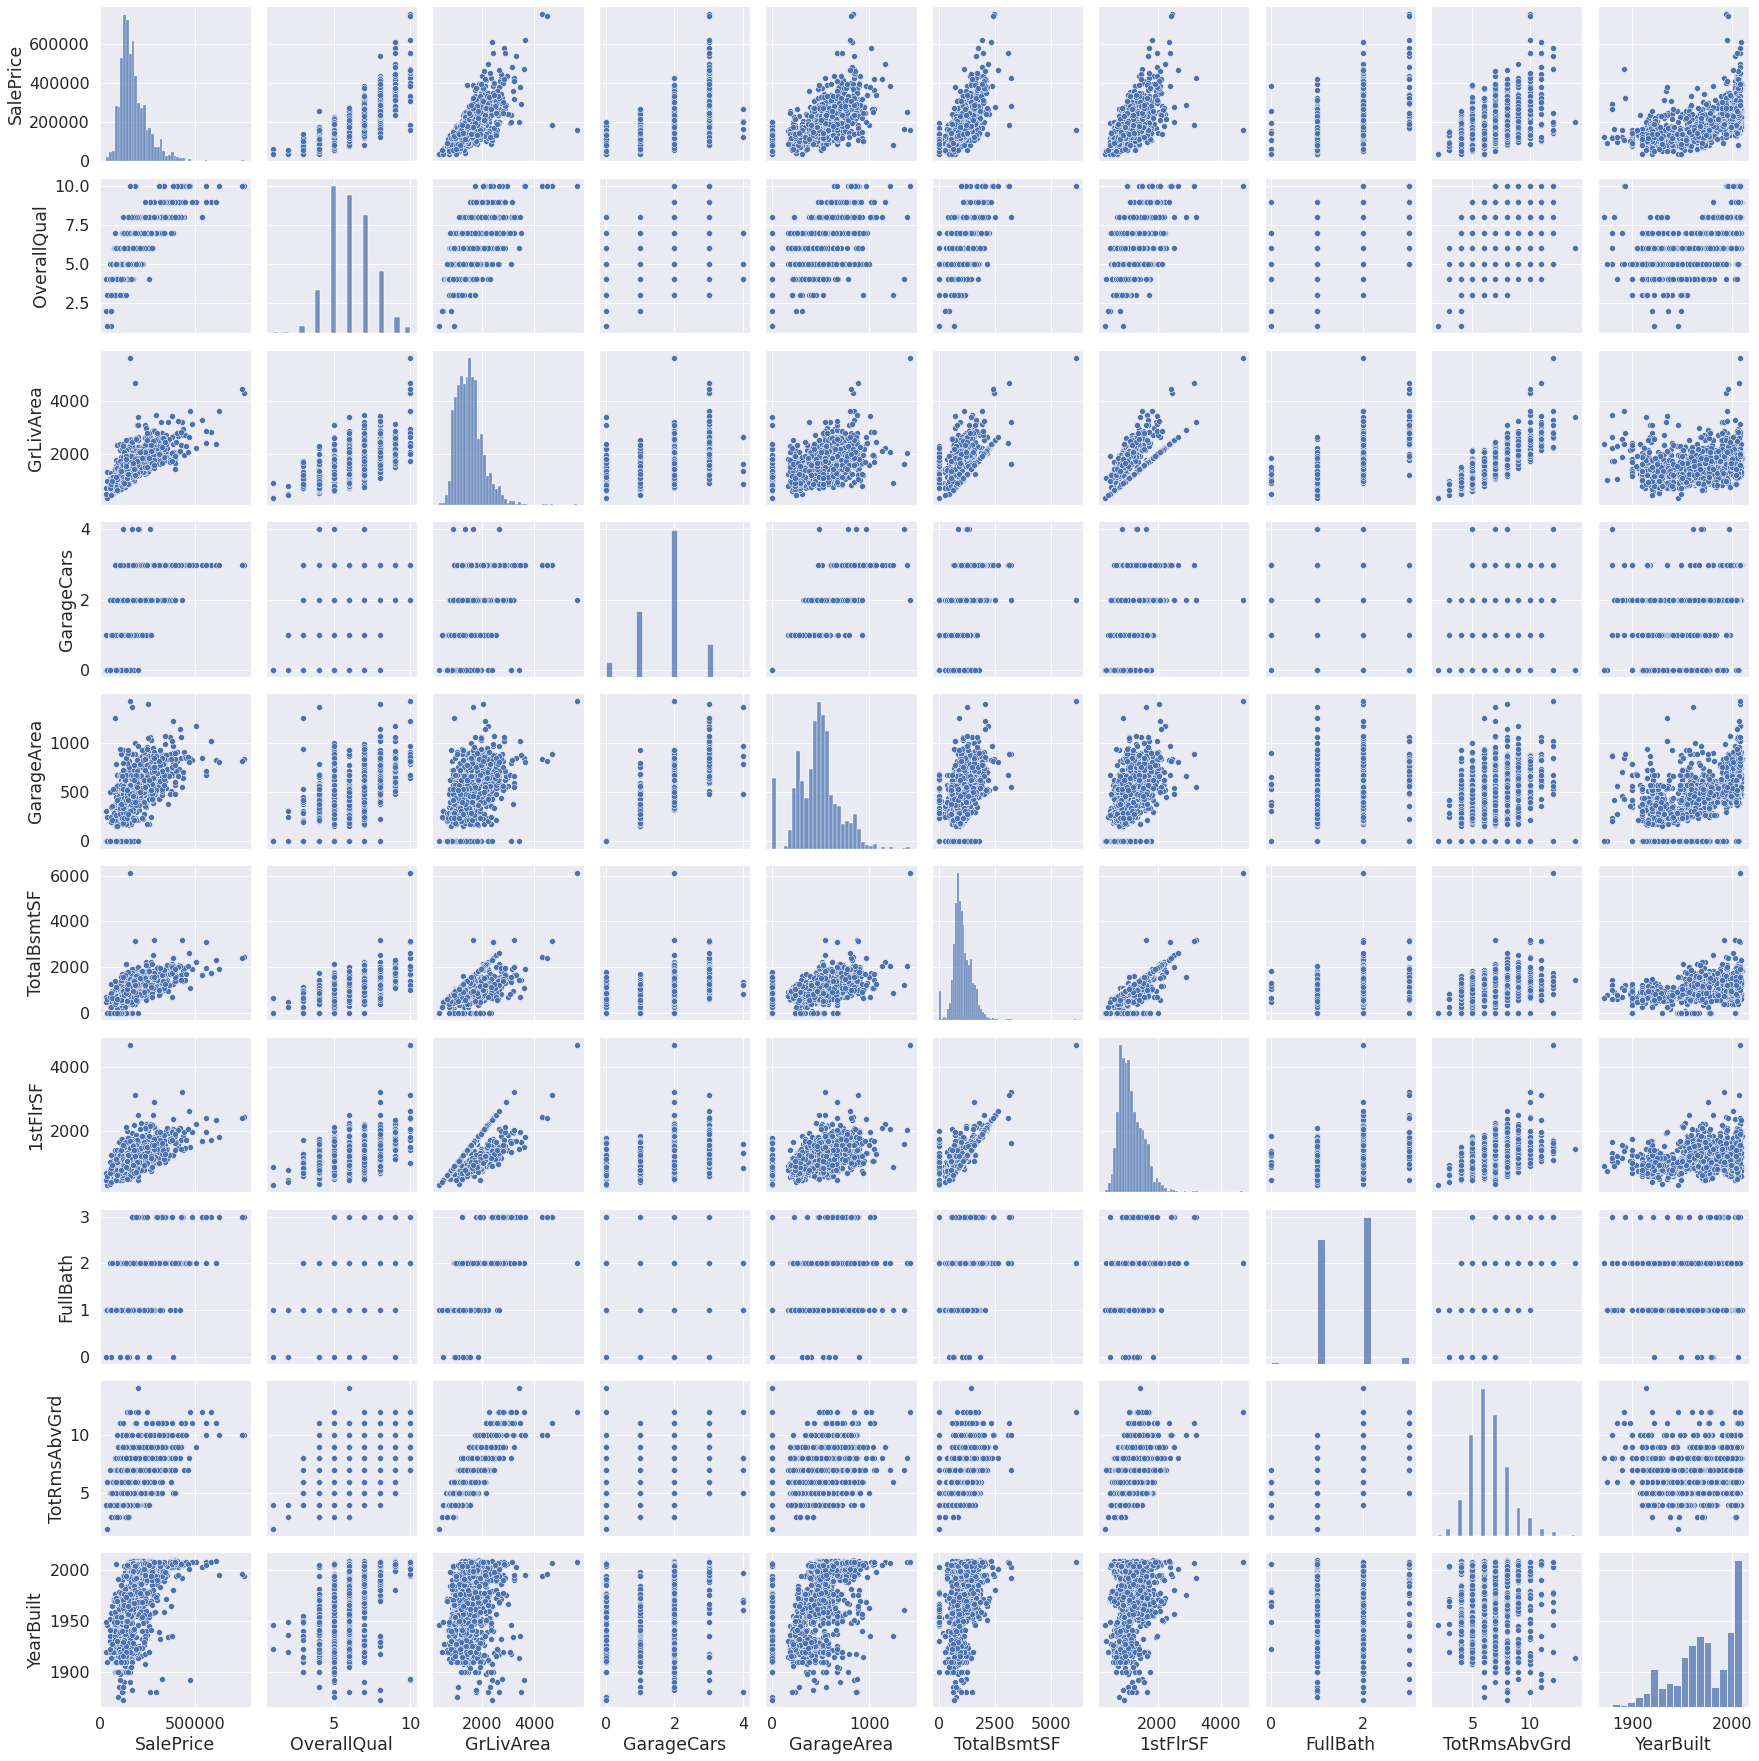

In [ ]:

sns.pairplot(train[mostCorrelated], size = 2.5)
plt.show();

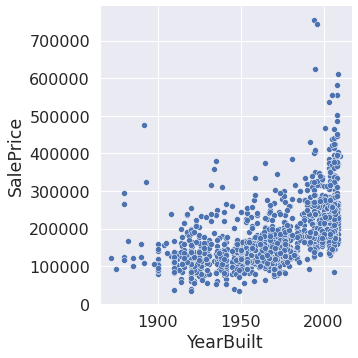

In [ ]:
# salePrice en fct des anneés de vente
sns.relplot(x="YearBuilt", y="SalePrice", data = train)

##**Les valeurs manquantes**

In [ ]:
#nombre des valeurs manquantes dans chaque colonne
train_null =train.isnull().sum(); test_null=test.isnull().sum() 
Nan= pd.concat([train_null, test_null], axis=1, keys=["Train", "Test"]) ;Nan

,Train,Test
Id,0,0.0
MSSubClass,0,0.0
MSZoning,0,4.0
LotFrontage,259,227.0
LotArea,0,0.0
...,...,...
MoSold,0,0.0
YrSold,0,0.0
SaleType,0,1.0
SaleCondition,0,0.0


In [ ]:
#repérer les colonnes avec des valeurs manquantes

many_nan = Nan[Nan.sum(axis=1) > 200] 
few_nan = Nan[Nan.sum(axis=1)>0 ][ Nan.sum(axis=1)<= 200] 
many_nan



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Train,Test
LotFrontage,259,227.0
Alley,1369,1352.0
FireplaceQu,690,730.0
PoolQC,1453,1456.0
Fence,1179,1169.0
MiscFeature,1406,1408.0


In [ ]:
# supprimer les colonnes vides 

train.drop(["LotFrontage","MiscFeature","Alley","FireplaceQu","PoolQC","Fence"], axis=1, inplace=True)
test.drop(["LotFrontage","MiscFeature","Alley","FireplaceQu","PoolQC","Fence"], axis=1, inplace=True)



In [ ]:
few_nan

,Train,Test
MSZoning,0,4.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtQual,37,44.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinType1,37,42.0


variable catégorielle `"MasVnrType"`





In [ ]:
# MasVnrType est une variable catégorielle

train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
# remplacer les valeurs manquantes par None 
train["MasVnrType"].fillna("None", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)

passons donc aux autres variables 

In [ ]:

types_train = train.dtypes 
num_train = types_train[(types_train == int) | (types_train == float)] 
cat_train = types_train[types_train == object]


#meme chose pour le test
types_test=test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)] 
cat_test = types_test[types_test == object]



In [ ]:
# les colonnes numériques  

numerical_cols_train = list(num_train.index)
numerical_cols_test = list(num_test.index) 



# remplir les valeurs manquantes par la moyenne : 

for i in numerical_cols_test: 
  train[i].fillna(train[i].mean(), inplace=True)
  test[i].fillna(test[i].mean(), inplace=True)
train[numerical_cols_train].isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
# les colonnes catégorielles  

categorical_cols_train = list(cat_train.index)
categorical_cols_test = list(cat_test.index) 

#liste des colonnes catégorielles avec des valeurs manquantes
cat_nan_train=[]
for i in categorical_cols_train :
 if i in  few_nan.index : 
    cat_nan_train.append(i)  

cat_nan_test=[]
for i in categorical_cols_test :
 if i in  few_nan.index : 
    cat_nan_test.append(i)


In [ ]:
#remplacer les valeurs manquantes par le terme le plus commun

for i in cat_nan_train: 
    k=cat_nan_train.index(i)
    train[i].fillna(list(train[cat_nan_test[k]].value_counts().index)[0], inplace=True) 
    test[i].fillna(list(test[cat_nan_test[k]].value_counts().index)[0], inplace=True)

train[cat_nan_train].isnull().sum()    

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

vérifions c'est il y'a encore de valeurs manquantes

In [ ]:
train_null =train.isnull().sum(); test_null=test.isnull().sum() 
Nan= pd.concat([train_null, test_null], axis=1, keys=["Train", "Test"]) ;Nan
few_nan = Nan[Nan.sum(axis=1)>0 ][ Nan.sum(axis=1)<= 200] 

few_nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Train,Test


Ainsi nous avons reglé le problème des valeurs manquantes

##**Feature Engineering**

Pour rendre la variable cible gaussienne nous avons ajouté log(SalePrice) pour la base données

<function tuple.index>

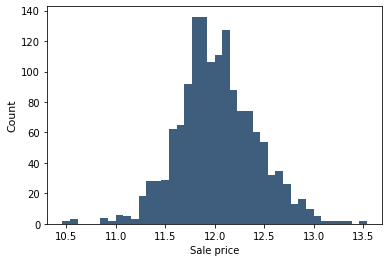

In [ ]:
train["LogPrice"] = np.log(train["SalePrice"]) 

plt.figure(figsize=(6,4)) 
plt.xlabel("Sale price", fontsize=10)  
plt.ylabel("Count", fontsize=11)
pp=plt.hist(train.LogPrice.values ,  color="#3F5D7D", bins=40 )
pp.index


Encoding des variables catégorielles 

In [ ]:
# label encoding pour les variables catégorielles : 
from sklearn import preprocessing
categorical_cols_train 
for i in categorical_cols_train :
 le = preprocessing.LabelEncoder() 
 le.fit(train[i])
 train[i] = le.fit_transform(train[i]) 
 test[i] = le.fit_transform(test[i]) 



In [ ]:
train[categorical_cols_train[0]].value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: MSZoning, dtype: int64

 **Nouvelles colonnes**

In [ ]:
# let's try training the models after adding new features to the data 

new_train = train.copy()

new_train['TotalSF']=new_train['TotalBsmtSF'] + new_train['1stFlrSF'] + new_train['2ndFlrSF']

new_train['Total_Bathrooms'] = (new_train['FullBath'] + (0.5 * new_train['HalfBath']) +
                               new_train['BsmtFullBath'] + (0.5 * new_train['BsmtHalfBath']))

new_train['Total_porch_sf'] = (new_train['OpenPorchSF'] + new_train['3SsnPorch'] +
                              new_train['EnclosedPorch'] + new_train['ScreenPorch'] +
                              new_train['WoodDeckSF'])

new_test = test.copy()

new_test['TotalSF']=new_test['TotalBsmtSF'] + new_test['1stFlrSF'] + new_test['2ndFlrSF']

new_test['Total_Bathrooms'] = (new_test['FullBath'] + (0.5 * new_test['HalfBath']) +
                               new_test['BsmtFullBath'] + (0.5 * new_test['BsmtHalfBath']))

new_test['Total_porch_sf'] = (new_test['OpenPorchSF'] + new_test['3SsnPorch'] +
                              new_test['EnclosedPorch'] + new_test['ScreenPorch'] +
                              new_test['WoodDeckSF'])  



new_train['haspool'] = new_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
new_train['has2ndfloor'] = new_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
new_train['hasgarage'] = new_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
new_train['hasbsmt'] = new_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
new_train['hasfireplace'] = new_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

new_test['haspool'] = new_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
new_test['has2ndfloor'] = new_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
new_test['hasgarage'] = new_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
new_test['hasbsmt'] = new_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
new_test['hasfireplace'] = new_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

##**Models**

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


##**Définir Train/Test**

In [ ]:
from sklearn.model_selection import train_test_split #to create validation data set

X_train= new_train.drop(["SalePrice","LogPrice"], axis=1)
y_train=new_train.LogPrice 
 
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets 



#fct pour calculer RMSLE et R2
def printScore(predictions,y):
  RMSLE=np.sqrt(mean_squared_log_error( y, predictions ))
  R2=r2_score(y,predictions)
  print(f"le RMSLE est {RMSLE}")
  print(f"le R2 est {R2}")

##**Linear regression**

In [ ]:
 

mdl = LinearRegression()
mdl.fit(X_training,y_training)
ypred =  mdl.fit(X_training,y_training).predict(X_valid)
submissionPr_lr =  mdl.fit(X_training,y_training).predict(test)

print(f" R^2 Train {mdl.score(X_train, y_train)} " ) 
printScore(ypred , y_valid) 

#score kaggle 0,144



##**Decision Tree Regression**

In [ ]:


dtreg = DecisionTreeRegressor(random_state = 100)
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training) 

dtr = grid_dtr.best_estimator_
dtreg.fit(X_training, y_training)
dtr_pred = dtreg.predict(X_valid) 
submissionPr_dtr=dtreg.predict(test) 

print(f" R^2 Train {dtr.score(X_train, y_train)} " ) 
printScore(dtr_pred , y_valid) 

#score kaggle 0,23


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 R^2 Train 0.9293559874589825 
le RMSLE est 0.01568587399720918
le R2 est 0.726747304842912


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   10.0s finished


## **Random Forest Regression**

In [ ]:

rfr = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rfr, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training) 
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rf.predict(X_valid) 
submissionPr_rf=rf.predict(test)

print(f" R^2 Train {rf.score(X_train, y_train)} " ) 
printScore(rf_pred , y_valid) 

#score kaggle 0,15 

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 R^2 Train 0.9293559874589825 
le RMSLE est 0.011002627528652905
le R2 est 0.8629855321385462


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.3min finished


##**xgboost**

In [ ]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training) 
xgb_pred = xgb.predict(X_valid)  
submissionPr_xgb=xgb.predict(new_test)

print(f" R^2 Train {xgb.score(X_train, y_train)} " ) 
printScore(xgb_pred , y_valid)  

#score kaggle 0,138 avant l'ajout des nouvelles colonnes 
#score kaggle 0,131 aprés l'ajout des nouvelles colonnes


[16:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 R^2 Train 0.981111033161778 
le RMSLE est 0.009426975905987275
le R2 est 0.9009324088817552


## **Gradient Boosting Regression / Parameter tuning**




In [ ]:

from sklearn import ensemble

params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls','max_features' : 20}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_training, y_training) 
reg_pred=reg.predict(X_valid)
submissionPr_reg=reg.predict(new_test)

print(f" R^2 Train {reg.score(X_train, y_train)} " ) 
printScore(reg_pred , y_valid)  

#score kaggle 0,13 

 R^2 Train 0.9723882702100216 
le RMSLE est 0.010021274160080189
le R2 est 0.8887913890770595



 **learning_rate**

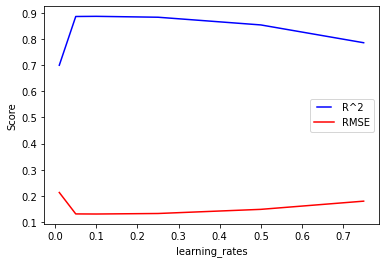

In [ ]:
from sklearn.metrics import mean_squared_error

learning_rates = [0.75 ,0.5, 0.25, 0.1, 0.05, 0.01]
r2_results = []
rmse_results = []
for eta in learning_rates:
    model = ensemble.GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, r2_results, 'b', label='R^2')
line2, = plt.plot(learning_rates, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('learning_rates')
plt.show()

learning_rate optimal est: 0,05


**N_estimators**


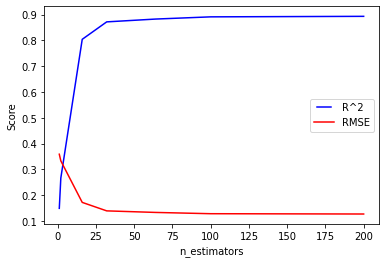

In [ ]:
n_estimators = [1, 2, 16, 32, 64, 100, 200]
r2_results = []
rmse_results = []

for estimator in n_estimators:
    model = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, r2_results, 'b', label='R^2')
line2, = plt.plot(n_estimators, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')
plt.show()

100 est le nombre optimal des arbres pour notre modèle  


**Max_depth**

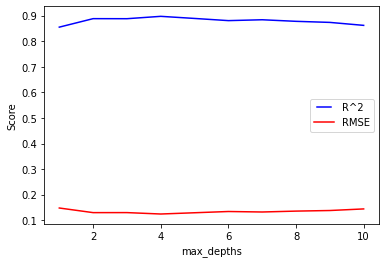

In [ ]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
r2_results = []
rmse_results = []

for max_depth in max_depths:
    model = ensemble.GradientBoostingRegressor(max_depth=max_depth)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, r2_results, 'b', label='R^2')
line2, = plt.plot(max_depths, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depths')
plt.show()

nous allons choisir 5 comme max_dephts 

**Min_samples_split**

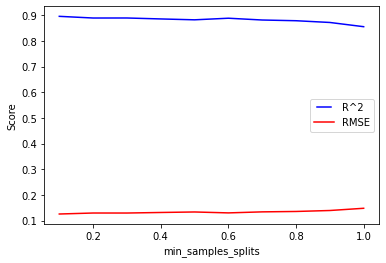

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
r2_results = []
rmse_results = []

for min_samples_split in min_samples_splits:
    model = ensemble.GradientBoostingRegressor(min_samples_split=min_samples_split)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, r2_results, 'b', label='R^2')
line2, = plt.plot(min_samples_splits, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_splits')
plt.show()

0,25 est optimal

**Min_samples_leaf**

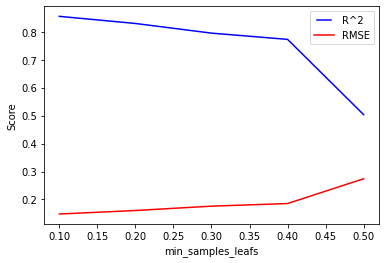

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
r2_results = []
rmse_results = []

for min_samples_leaf in min_samples_leafs:
    model = ensemble.GradientBoostingRegressor(min_samples_leaf=min_samples_leaf)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, r2_results, 'b', label='R^2')
line2, = plt.plot(min_samples_leafs, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_leafs')
plt.show()

**max_features**

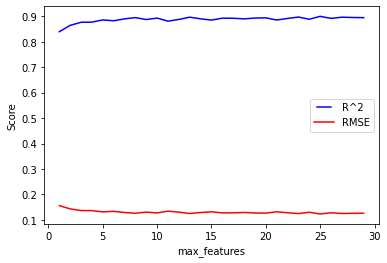

In [ ]:
max_features = list(range(1,30))
r2_results = []
rmse_results = []

for max_feature in max_features:
    model = ensemble.GradientBoostingRegressor(max_features=max_feature)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, r2_results, 'b', label='R^2')
line2, = plt.plot(max_features, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')
plt.show()

## **Sumbission**

In [ ]:
from google.colab import files
submission=pd.read_csv(io.BytesIO(data_to_load['sample_submission.csv']))
submission['SalePrice']=np.exp(submissionPr_xgb)

submission.to_csv('sub.csv', sep = ',', index = False) 
files.download('sub.csv') 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>